In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")
df_train.drop(df_train.columns[0], axis=1, inplace=True)
df_test.drop(df_test.columns[0], axis=1, inplace=True)
df_orignal = pd.concat([df_train,df_test], axis = 0)

In [23]:
from sklearn.model_selection import train_test_split
df,_ = train_test_split(df_train, test_size=1-0.15, stratify=df_train['is_fraud'], random_state=42)
df.shape

(194501, 22)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194501 entries, 398918 to 375392
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  194501 non-null  object 
 1   cc_num                 194501 non-null  int64  
 2   merchant               194501 non-null  object 
 3   category               194501 non-null  object 
 4   amt                    194501 non-null  float64
 5   first                  194501 non-null  object 
 6   last                   194501 non-null  object 
 7   gender                 194501 non-null  object 
 8   street                 194501 non-null  object 
 9   city                   194501 non-null  object 
 10  state                  194501 non-null  object 
 11  zip                    194501 non-null  int64  
 12  lat                    194501 non-null  float64
 13  long                   194501 non-null  float64
 14  city_pop               194501 non-nu

In [25]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [26]:
df['is_fraud_cat'] = df['is_fraud'].apply(lambda x: "Fraud" if x==1 else "No Fraud")
is_fraud_values = df['is_fraud_cat'].value_counts()
is_fraud_values

is_fraud_cat
No Fraud    193375
Fraud         1126
Name: count, dtype: int64

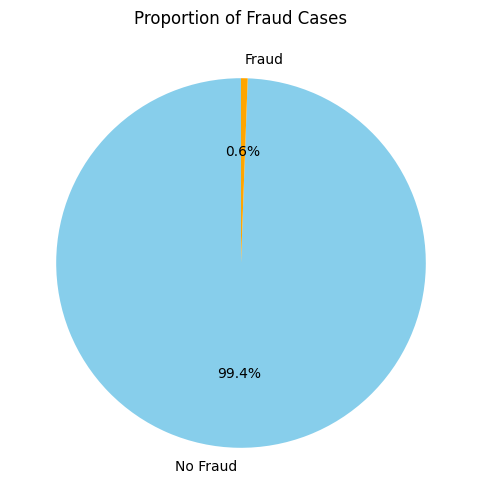

In [27]:
plt.figure(figsize=(6, 6))
plt.pie(is_fraud_values, labels=is_fraud_values.index, autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Proportion of Fraud Cases')
plt.show()


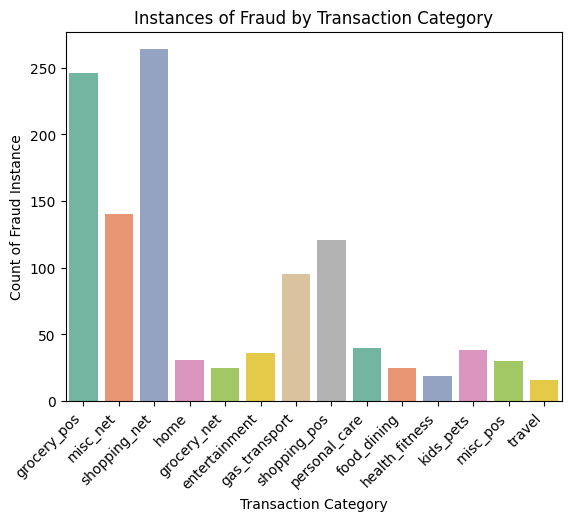

<Figure size 700x700 with 0 Axes>

In [28]:
sns.countplot(x="category", data=df[df['is_fraud_cat']=="Fraud"], palette="Set2", hue = 'category')
plt.title('Instances of Fraud by Transaction Category')
plt.xlabel('Transaction Category')
plt.ylabel('Count of Fraud Instance')
plt.xticks(rotation=45, ha = 'right')
plt.figure(figsize=(7, 7))
plt.show()

In [29]:
df2 = df.copy()
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194501 entries, 398918 to 375392
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  194501 non-null  object 
 1   cc_num                 194501 non-null  int64  
 2   merchant               194501 non-null  object 
 3   category               194501 non-null  object 
 4   amt                    194501 non-null  float64
 5   first                  194501 non-null  object 
 6   last                   194501 non-null  object 
 7   gender                 194501 non-null  object 
 8   street                 194501 non-null  object 
 9   city                   194501 non-null  object 
 10  state                  194501 non-null  object 
 11  zip                    194501 non-null  int64  
 12  lat                    194501 non-null  float64
 13  long                   194501 non-null  float64
 14  city_pop               194501 non-nu

In [30]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
label_encoder = LabelEncoder()
df2['gender'] = label_encoder.fit_transform(df['gender'])
df2.gender
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,is_fraud_cat
398918,2019-06-30 18:37:50,377654590313960,fraud_Bode-Schuster,kids_pets,55.05,Lawrence,Davis,1,7421 Serrano Lane Apt. 580,Powell,...,-84.0400,25459,"Teacher, special educational needs",1969-02-22,2b362b0b448963092065fb8e6c38ce8d,1341081470,36.175640,-84.646341,0,No Fraud
655541,2019-10-06 12:02:58,4956828990005111019,fraud_Block Group,misc_pos,3.03,Kenneth,Robinson,1,269 Sanchez Rapids,Elizabeth,...,-74.2239,124967,Operational researcher,1980-12-21,6387314112483e8206f351961340d7ce,1349524978,40.939505,-74.256242,0,No Fraud
911788,2019-12-29 10:56:07,4788103653396,fraud_Nienow PLC,entertainment,139.01,Kristin,Williams,0,36366 Smith Road,Miamisburg,...,-84.2675,36784,"Investment banker, corporate",1941-07-31,aa1d02f505bae2761149afd24ec4d72d,1356778567,39.822635,-84.105583,0,No Fraud
86389,2019-02-20 04:55:42,377264520876399,fraud_Bernhard Inc,gas_transport,55.74,Kara,Miles,0,2076 Thomas Roads Suite 970,Cassatt,...,-80.5000,4424,Lawyer,1961-07-31,e4e7b653235656a211fe759f1abf5cba,1329713742,34.962050,-80.168628,0,No Fraud
289156,2019-05-22 09:41:58,4155021259183870,fraud_Doyle Ltd,grocery_pos,93.78,Renee,Parrish,0,174 Jennifer Meadow Apt. 467,Mountain Park,...,-98.9591,540,Research scientist (life sciences),1983-10-12,9acd65e2601946fc132a9d64df5178ff,1337679718,34.068722,-98.940711,0,No Fraud


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194501 entries, 398918 to 375392
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  194501 non-null  object 
 1   cc_num                 194501 non-null  int64  
 2   merchant               194501 non-null  object 
 3   category               194501 non-null  object 
 4   amt                    194501 non-null  float64
 5   first                  194501 non-null  object 
 6   last                   194501 non-null  object 
 7   gender                 194501 non-null  int32  
 8   street                 194501 non-null  object 
 9   city                   194501 non-null  object 
 10  state                  194501 non-null  object 
 11  zip                    194501 non-null  int64  
 12  lat                    194501 non-null  float64
 13  long                   194501 non-null  float64
 14  city_pop               194501 non-nu

In [32]:
df3 = df2.drop(['unix_time','trans_date_trans_time',
                'cc_num','trans_num','street','dob','city',
                'merchant','job','last','first','state','is_fraud_cat']
                ,axis = 1)

df3_dummies = pd.get_dummies(df3.select_dtypes('object'), dtype = int)
df4 = pd.concat([df3.drop(df3.select_dtypes('object').columns, axis = 1), df3_dummies],axis = 1)

print(df4.shape)
df4.head()

(194501, 23)


,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
398918,55.05,1,37849,36.0435,-84.0400,25459,36.175640,-84.646341,0,0,...,0,0,0,1,0,0,0,0,0,0
655541,3.03,1,7208,40.6747,-74.2239,124967,40.939505,-74.256242,0,0,...,0,0,0,0,0,1,0,0,0,0
911788,139.01,0,45342,39.6321,-84.2675,36784,39.822635,-84.105583,0,1,...,0,0,0,0,0,0,0,0,0,0
86389,55.74,0,29032,34.3424,-80.5000,4424,34.962050,-80.168628,0,0,...,0,0,0,0,0,0,0,0,0,0
289156,93.78,0,73559,34.7032,-98.9591,540,34.068722,-98.940711,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
X = df4.reset_index(drop='index').drop('is_fraud', axis=1)
y = df4.reset_index(drop='index')['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train['amt'] = scaler.fit_transform(X_train[['amt']])
X_test['amt'] = scaler.transform(X_test[['amt']])

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

smote = SMOTE(random_state=42)
rf_smote = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rf_smote.fit(X_train_smote,y_train_smote)
y_pred_smote = rf_smote.predict(X_test)
report = classification_report(y_test, y_pred_smote, output_dict=True)
report_df = pd.DataFrame(report).transpose()




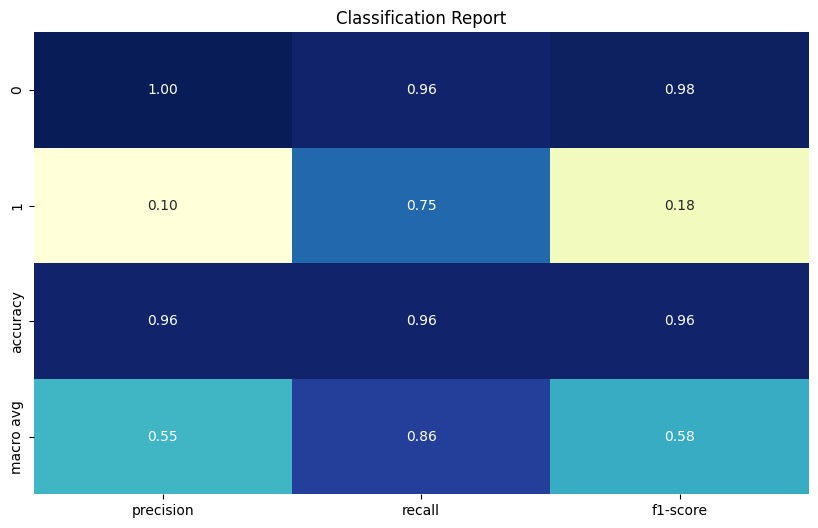

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f', cbar=False)
plt.title("Classification Report")
plt.show()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_17020\1849394537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')


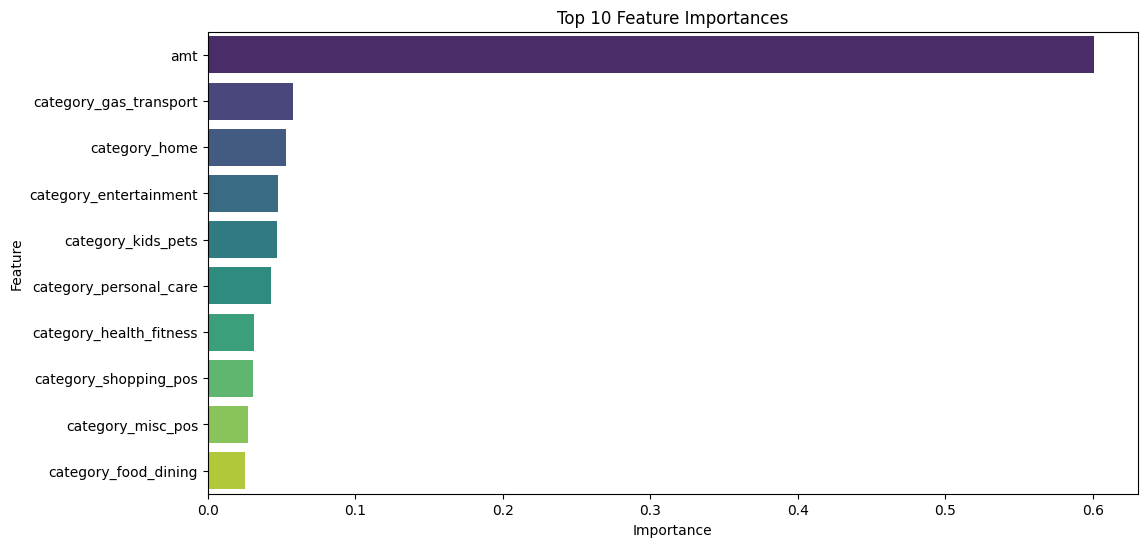

In [37]:
importances = rf_smote.feature_importances_
feature_names = X_train.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title("Top 10 Feature Importances")
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_smote)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


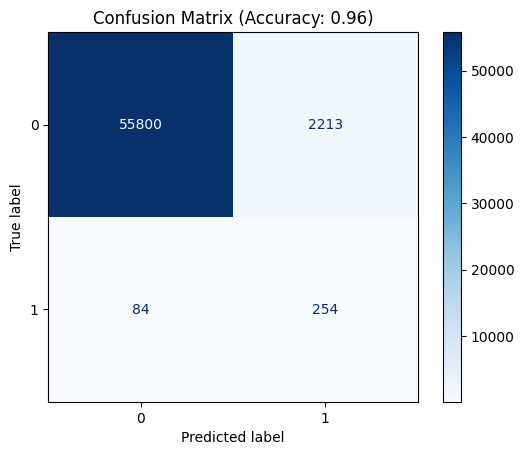

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_smote, labels=rf_smote.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_smote.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()